<a href="https://colab.research.google.com/github/vedangi2610/FHE-project-/blob/master/interest_vector/test/updated_tweetpreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vedangi2610/FHE-project-/blob/master/tweetpreprocess.ipynb)

In [1]:
!python -m spacy download en_core_web_lg
import pandas as pd
import spacy
from spacy.tokenizer import Tokenizer

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
# removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess_tweets(t, tweet_df):

  df = pd.read_csv('https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/interest_vector/test/stopwords_english_covid.csv')
  stoplist = df['NGRAM'].tolist()
  #adding a new column for cleaned tweets
  tweet_df.insert(4, "cleaned_tweets", tweet_df['text'], True)
  

  # changing to lower case 
  tweet_df['cleaned_tweets'] = tweet_df.cleaned_tweets.str.lower()
  

  # removing url links
  import re #(regex library for regular expressions)

  # for urls with http or https
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

  #for urls with or without www
  tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

  # remove @mention
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'@mention', '', x))
  

  # removing html tags that get embedded in tweets during extraction
  tweet_df.cleaned_tweets= tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

  # removing digits
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.astype(str).str.replace('\d+', '')

  # remove all remaining characters that aren't letters, white space, or 
  # the following #:)(/\='] that are used in emojis or hashtags
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
  
  
  # removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
  # remove stopwords
  additional_words  = ['rt','rts','retweet'] #other words to remove
  additional_words.extend(stoplist)
  print(additional_words)
  stop_words = set().union(stopwords.words('english'), additional_words)
  tweet_df['cleaned_tweets'] = tweet_df['cleaned_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

  #Tokenization
  tokenizer = Tokenizer(nlp.vocab)
  tokens = []

  for doc in tokenizer.pipe(tweet_df['cleaned_tweets'], batch_size = 500):
    doc_tokens = []
    for token in doc:
        if token not in stop_words:
          doc_tokens.append(token)
    tokens.append(doc_tokens)

  tweet_df['tokens'] = tokens
  

  #Lemmatization
  lemmas = []

  for text in tweet_df['cleaned_tweets']:
    doc = nlp(text)
    doc_lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
          doc_lemmas.append(token.lemma_)
    lemmas.append(doc_lemmas)
  tweet_df['lemmas'] = lemmas
  

  # viewing the tweets and the cleaned tweets
  tweet_df[['text', 'cleaned_tweets']]
  tweet_df.to_csv("/content/FHE-project-/interest_vector/test/preprocessed_topics/preprocess"+t)

In [9]:
#collecting data
topics = ["Entertainment.csv","Entrepreneurship.csv","Politics.csv","ScienceandTech.csv","Sports.csv"]

for t in topics:
  url = 'https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/data_collection/'+t
  tweet_df = pd.read_csv(url)
  preprocess_tweets(t, tweet_df)

['rt', 'rts', 'retweet', 'the', 'to', 'and', 'of', 'a', 'in', 'for', 'that', 'is', 'on', 'with', 'was', 'as', 'at', 'it', 'be', 'are', 'by', 'from', 'said', 'have', 'he', 'has', 'this', 'will', 'an', 'his', 'not', 'i', 'or', 'you', 'we', 'but', 'their', 'they', 'who', 'more', 'been', 'were', 'new', 'about', 'which', 'also', 'all', 'her', 'had', 'one', 'she', 'its', 'can', 'our', 'people', 'up', 'after', 'out', 'would', 'when', 'your', 'if', 'other', 'so', 'than', 'there', 'time', 'over', 'what', 'some', 'first', 'into', 'two', 'no', 'like', 'just', "it's", 'year', 'may', 'last', 'them', 'do', 'now', 'years', 'my', 'could', 'state', 'how', 'us', 'get', 'any', 'while', 'only', 'most', 'during', 'being', 'through', 'where', 'because', 'those', 'before', 'these', 'president', 'many', 'make', 'health', '2019', 'government', 'him', 'police', 'back', 'day', 'including', 'says', 'work', 'such', 'home', 'even', 'made', 'company', 'u.s', 'million', 'public', 'three', 'against', 'then', 'market',

KeyboardInterrupt: ignored

In [1]:
# !git clone  https://github.com/vedangi2610/FHE-project-.git
!git config --global user.email "radhamarathe13@gmail.com"
!git config --global user.name "radhamarathe"
# !git add -A
# !git commit -m "Adding updated preprocessed topics"
# !git remote add origin https://radhamarathe:<password>@github.com/vedangi2610/FHE-project-.git
# !git push -u origin master

Cloning into 'FHE-project-'...
remote: Enumerating objects: 676, done.
remote: Counting objects: 100% (333/333), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 676 (delta 107), reused 273 (delta 72), pack-reused 343
Receiving objects: 100% (676/676), 68.44 MiB | 20.76 MiB/s, done.
Resolving deltas: 100% (235/235), done.
Checking out files: 100% (356/356), done.


In [ ]:
url = 'https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/data_collection/test_csv.csv'
tweet_df = pd.read_csv(url,error_bad_lines=False)
preprocess_usertweets(username, tweet_df)

In [ ]:
def preprocess_usertweets(username, tweet_df):

  #adding a new column for cleaned tweets
  tweet_df.insert(4, "cleaned_tweets", tweet_df['text'], True)
  

  # changing to lower case 
  tweet_df['cleaned_tweets'] = tweet_df.cleaned_tweets.str.lower()
  

  # removing url links
  import re #(regex library for regular expressions)

  # for urls with http or https
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

  #for urls with or without www
  tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

  # remove @mention
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'@mention', '', x))
  

  # removing html tags that get embedded in tweets during extraction
  tweet_df.cleaned_tweets= tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

  # removing digits
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.astype(str).str.replace('\d+', '')

  # remove all remaining characters that aren't letters, white space, or 
  # the following #:)(/\='] that are used in emojis or hashtags
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
  
  
  # removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
  # remove stopwords
  additional_words  = ['rt','rts','retweet'] #other words to remove
  stop_words = set().union(stopwords.words('english'), additional_words)
  tweet_df['cleaned_tweets'] = tweet_df['cleaned_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

  #Tokenization
  tokenizer = Tokenizer(nlp.vocab)
  tokens = []

  for doc in tokenizer.pipe(tweet_df['cleaned_tweets'], batch_size = 500):
    doc_tokens = []
    for token in doc:
        if token not in stop_words:
          doc_tokens.append(token)
    tokens.append(doc_tokens)

  tweet_df['tokens'] = tokens
  

  #Lemmatization
  lemmas = []

  for text in tweet_df['cleaned_tweets']:
    doc = nlp(text)
    doc_lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
          doc_lemmas.append(token.lemma_)
    lemmas.append(doc_lemmas)
  tweet_df['lemmas'] = lemmas
  

  # viewing the tweets and the cleaned tweets
  tweet_df[['text', 'cleaned_tweets']]
  tweet_df.to_csv("preprocess_" + username + ".csv")

In [ ]:
#building vocab
#for t in topics:
tweet_df = pd.read_csv('preprocess_user.csv')
vocab_df = tweet_df.lemmas.str.split().explode().value_counts()
vocab_df.to_csv("vocab.csv")

IMPORTING FILES FROM DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pre_Entertainment = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessEntertainment.csv')
pre_Entrepreneurship = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessEntrepreneurship.csv')
pre_Healthcare = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessHealthcare.csv')
pre_Politics = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessPolitics.csv')
pre_ScienceandTech = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessScienceandTech.csv')
pre_Sports = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessSports.csv')

vocab_Entertainment = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabEntertainment.csv')
vocab_Entrepreneurship = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabEntrepreneurship.csv')
vocab_Healthcare  = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabHealthcare.csv')
vocab_Politics = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabPolitics.csv')
vocab_ScienceandTech = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabScienceandTech.csv')
vocab_Sports = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabSports.csv')

In [ ]:
pre_Entertainment.head()

,Unnamed: 0,id,username,created_at,lang,cleaned_tweets,favorite_count,retweet_count,text,tokens,lemmas
0,0,1263830830515798016,tomhanks,2020-05-22 13:55:25,en,grads chosen ones print sheepskin hanx,16179,1987,"To all the Grads of 2020, you Chosen Ones! Pr...","[grads, chosen, ones, print, sheepskin, hanx]","['grad', 'choose', 'one', 'print', 'sheepskin'..."
1,1,1263829087971274754,tomhanks,2020-05-22 13:48:30,en,big day skyline high school oakland ca glad pa...,47527,1959,"Big Day for Skyline High School in Oakland, CA...","[big, day, skyline, high, school, oakland, ca,...","['big', 'day', 'skyline', 'high', 'school', 'o..."
2,2,1263595798115180546,tomhanks,2020-05-21 22:21:29,en,oh yeah mayor chunschofsky joining whenweallvo...,3703,460,"Oh, yeah! Mayor @CHunschofsky is joining @Whe...","[oh, yeah, mayor, chunschofsky, joining, whenw...","['oh', 'yeah', 'mayor', 'chunschofsky', 'join'..."
3,3,1262945008602107904,tomhanks,2020-05-20 03:15:29,en,look hit king deuce hanx,14468,534,Look! I hit on a King and a Deuce! 21! Hanx. h...,"[look, hit, king, deuce, hanx]","['look', 'hit', 'king', 'deuce', 'hanx']"
4,4,1261345327593865217,tomhanks,2020-05-15 17:18:55,en,class whenweallvote tossing prom-party special...,5185,435,Class of ‘20! @WhenWeAllVote is tossing a prom...,"[class, whenweallvote, tossing, prom-party, sp...","['class', 'whenweallvote', 'toss', 'prom', 'pa..."


IGNORE

In [ ]:
# word cloud to visualise most common words (doing this just to see if we can get good words for vocab)
!pip install wordcloud
!pip install matplotlib
from wordcloud import  WordCloud
import matplotlib.pyplot as plt



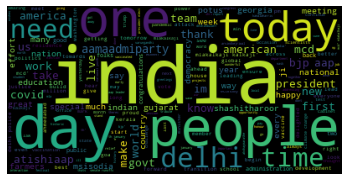

In [ ]:
words = tweet_df['cleaned_tweets'].values 

wordcloud = WordCloud().generate(str(words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()